Predict the Item outlet sales on other variables as sales is continuous variable so we use regression technique to solve this problem. The train data set have 85 observations and 12 variables and test data set have 5861 observation and 11 variables


1. Import libraries
2. Import data sets
3. Check for missing values
4. Missing values imputation
5. Label encoding
6. Model fitting
    1. Decision tree
    2. Random forest with hyperparameter tuning using Randomized Search CV
7. Prediction test data

In [1]:
import os

In [2]:
os.chdir('F:/Analytics Vidya/Big Mart Sales')

## Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data sets

In [50]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Relace same categories with same name

In [51]:
train.replace('low fat','Low Fat',inplace=True)
train.replace('LF','Low Fat',inplace=True)
train.replace('reg','Regular',inplace=True)
test.replace('low fat','Low Fat',inplace=True)
test.replace('LF','Low Fat',inplace=True)
test.replace('reg','Regular',inplace=True)


Add new column No_of_Years by taking 2013 as current year

In [52]:
train['No_of_Years'] = 2013-train['Outlet_Establishment_Year']
test['No_of_Years'] = 2013-test['Outlet_Establishment_Year']


Delete unnecessary columns

In [53]:
train.drop(['Item_Identifier'],axis=1,inplace=True)
test.drop(['Item_Identifier'],axis=1,inplace=True)
train.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
test.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
train.drop(['Outlet_Identifier'],inplace=True,axis=1)
test.drop(['Outlet_Identifier'],inplace=True,axis=1)

In [ ]:
print(train.shape)
print(test.shape)


In [54]:
train1 = pd.concat([train.iloc[:,0:8],train.iloc[:,[9]],train.iloc[:,[8]]],axis=1)
test1 = test.iloc[:,:]

## Check Missing Values

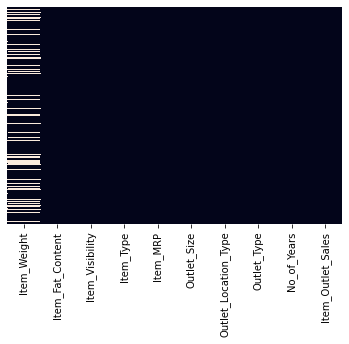

In [139]:
sns.heatmap(train1.isnull(),yticklabels=False,cbar=False)

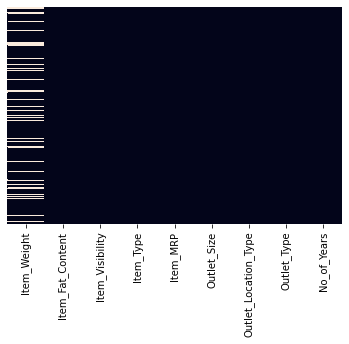

In [140]:
sns.heatmap(test1.isnull(),yticklabels=False,cbar=False)

## Missing values imputation and label encoding

In [138]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [103]:
encoder=LabelEncoder()
ohe=OneHotEncoder()

In [76]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')

Missing value imputations

In [55]:
train1.Outlet_Size = train1.Outlet_Size.fillna('Small')
test1.Outlet_Size = test1.Outlet_Size.fillna('Small')

In [56]:
train1.Outlet_Size= encoder.fit_transform(train1.Outlet_Size)
test1.Outlet_Size= encoder.fit_transform(test1.Outlet_Size)

In [57]:
train1.Outlet_Location_Type=encoder.fit_transform(train1.Outlet_Location_Type)
test1.Outlet_Location_Type=encoder.fit_transform(test1.Outlet_Location_Type)

In [104]:
train1.Item_Fat_Content=encoder.fit_transform(train1.Item_Fat_Content)
test1.Item_Fat_Content=encoder.fit_transform(test1.Item_Fat_Content)
train1.Item_Type=encoder.fit_transform(train1.Item_Type)
test1.Item_Type=encoder.fit_transform(test1.Item_Type)
train1.Outlet_Type=encoder.fit_transform(train1.Outlet_Type)
test1.Outlet_Type=encoder.fit_transform(test1.Outlet_Type)



In [105]:
train2= pd.DataFrame(imp.fit_transform(train1))
test2=pd.DataFrame(imp.fit_transform(test1))

## Splitting train data into train and test

In [22]:
from sklearn.model_selection import train_test_split

In [85]:
x=train2.iloc[:,0:9]
y=train2.iloc[:,[9]]

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## Model BUilding

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
model_dec = DecisionTreeRegressor(random_state=0)

In [90]:
model_dec.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

Prediction on test data

In [91]:
prediction=model_dec.predict(x_test)

### Model perfomance

In [137]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [92]:
Rsq=r2_score(y_test,prediction)
Rsq

0.15618723713465232

In [93]:
rmse=np.sqrt(mean_squared_error(y_test,prediction))
rmse

1571.5347153094485

### Decision tree gives poor result

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rf=RandomForestRegressor()

## Hyper parameter tuning using Randomized Search CV

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1500,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


In [42]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [111]:
model_rf = RandomizedSearchCV(estimator = rf, param_distributions= random_grid, 
                               n_iter=50,cv=5,random_state=0, 
                               n_jobs = -1,verbose = 2)

In [112]:
model_rf.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 30.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 255, 411, 566,
                                                         722, 877, 1033, 1188,
                                                         1344, 1500]},
                   random_state=0, verbose=2)

In [113]:
model_rf.best_params_

{'n_estimators': 411,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [114]:
model_rf.best_score_

0.5908284571027835

In [115]:
prediction = pd.DataFrame(model_rf.predict(x_test))

In [99]:
prediction

,0
0,2584.772139
1,1862.126640
2,2522.422053
3,2041.418832
4,2478.527296
...,...
1700,1753.819212
1701,465.268712
1702,4360.869341
1703,181.902929


## Prediction test set

In [133]:
pred_test=pd.DataFrame(model_rf.predict(test2))
pred_test=pred_test.iloc[:,:]

In [135]:
pred=pred_test.to_csv('F:\Analytics Vidya\Big Mart Sales\pred_test.csv',index=False)